Data Shape: (622, 463, 599)
Data Type: int16
Header: OrderedDict([('type', 'short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([622, 463, 599])), ('space directions', array([[0.38, 0.  , 0.  ],
       [0.  , 0.38, 0.  ],
       [0.  , 0.  , 0.38]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([-123.9, -219.5, -714.4]))])
Reading Vx3...
Spacing: (0.38000000000000006, 0.38000000000000006, 0.38000000000000006)


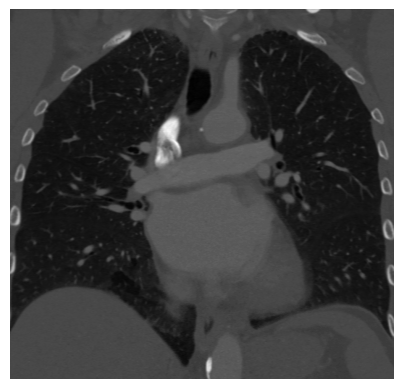

Window Level Adjusted!


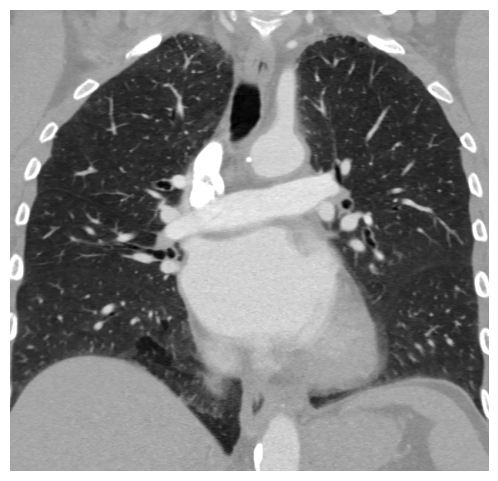

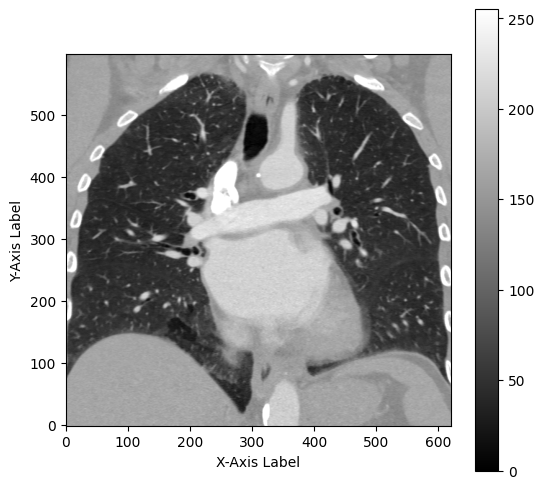

In [9]:
# Code Block 1
### THIS CODE WORKS TO MAKE one .PNG file from a specific Vx3
## Instructions: Two inputs are needed, "Vx3_path", and "output_path"
## Input the path for the Vx3 and then create the image within the same folder

import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import nrrd

#Input path for Vx3
Vx3_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-48-0.5__QR40__RESEARCH__A__80KV_Qr40d_3_53074965/Additonal Images/Vx3-2.nrrd"
# Output path for PNG of Vx3 
# Replace with the desired output file path
output_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-48-0.5__QR40__RESEARCH__A__80KV_Qr40d_3_53074965/Additonal Images/Case-48-QC_Image502.png"  
output_path1 = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-48-0.5__QR40__RESEARCH__A__80KV_Qr40d_3_53074965/Additonal Images/Case-48-QC_Image502.png"  

# Load the image using nibabel to see image information
data, header = nrrd.read(Vx3_path)

# Print the metadata
print("Data Shape:", data.shape)
print("Data Type:", data.dtype)
print("Header:", header)

# Load the 3D image
Vx3 = sitk.ReadImage(Vx3_path)
print("Reading Vx3...")
# Get the size of the image in x, y, and z dimensions
size_x, size_y, size_z = Vx3.GetSize()
spacing = Vx3.GetSpacing()
y_index = Vx3.GetSize()[1] // 2
print("Spacing:", spacing)

# Extract the middle plane along the y-dimension
slice_2d = Vx3[:,y_index,:]
slice_array = sitk.GetArrayFromImage(slice_2d)

# Set the Window level
window_level_min = -1024  # Adjust these values according to your preference
window_level_max = 650

# Apply Window Level to image
windowed_image = sitk.IntensityWindowing(slice_2d, window_level_min, window_level_max, 0, 255)
windowed_slice_array = sitk.GetArrayFromImage(windowed_image)

#Show Vx3
plt.imshow(slice_array, cmap="gray",origin='lower')
plt.axis("off")
plt.show()
print("Window Level Adjusted!")

#Show Vx3 with correct window level

#Show Vx3 with correct window level
plt.figure(figsize=(size_x/100,size_z/100))
plt.imshow(windowed_slice_array, cmap="gray",origin='lower')
plt.axis("off")
plt.show()

# Save the Corrected Vx3 .PNG to output path
plt.imsave(output_path, windowed_slice_array, cmap="gray", origin='lower')



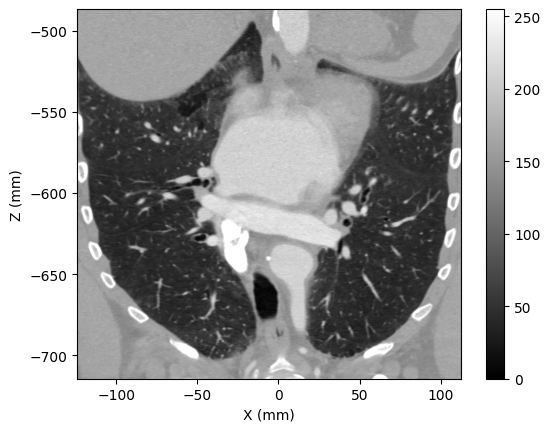

In [10]:
import SimpleITK as sitk
import matplotlib.pyplot as plt

# Input path for Vx3
Vx3_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-48-0.5__QR40__RESEARCH__A__80KV_Qr40d_3_53074965/Additonal Images/Vx3-2.nrrd"
output_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-48-0.5__QR40__RESEARCH__A__80KV_Qr40d_3_53074965/Additonal Images/Case-48-QC_Image502.png"  
# Load the 3D image
Vx3 = sitk.ReadImage(Vx3_path)

# Get the size of the image in x, y, and z dimensions
size_x, size_y, size_z = Vx3.GetSize()
spacing = Vx3.GetSpacing()
origin = Vx3.GetOrigin()

# Choose the desired y-slice (e.g., middle slice)
y_slice_index = size_y // 2

# Extract the middle plane along the y-dimension
slice_2d = Vx3[:, y_slice_index, :]

# Set the Window level
window_level_min = -1024  # Adjust these values according to your preference
window_level_max = 650

# Apply Window Level to image
windowed_image = sitk.IntensityWindowing(slice_2d, window_level_min, window_level_max, 0, 255)
windowed_slice_array = sitk.GetArrayFromImage(windowed_image)

# Save the 2D slice as a .png file
output_path = "output_slice.png"
plt.imshow(windowed_slice_array, cmap='gray', extent=(origin[0], origin[0] + size_x * spacing[0], origin[2], origin[2] + size_z * spacing[2]))
plt.colorbar()
plt.xlabel("X (mm)")
plt.ylabel("Z (mm)")
plt.savefig(output_path, dpi=300)  # Adjust DPI as needed for spatial accuracy
plt.show()


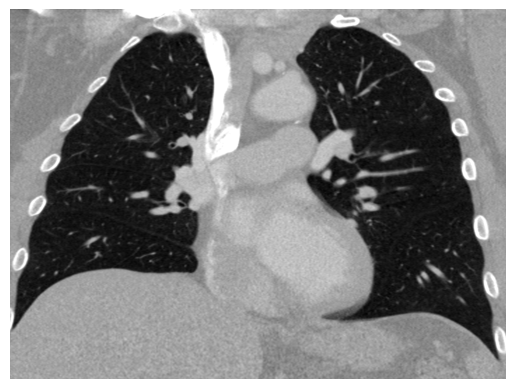

In [18]:
import SimpleITK as sitk
import matplotlib.pyplot as plt
from PIL import Image

# Input path for Vx3
Vx3_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-32-0.75__QR40RESEARCH__A_80KV_Qr40d_51292112/Markups/88-Jensen/Vx3.nrrd"


# Load the 3D image
Vx3 = sitk.ReadImage(Vx3_path)

# Get the size of the image in x, y, and z dimensions
size_x, size_y, size_z = Vx3.GetSize()
spacing = Vx3.GetSpacing()

# Choose the desired y-slice (e.g., middle slice)
y_slice_index = size_y // 2

# Extract the middle plane along the y-dimension
slice_2d = Vx3[:, y_slice_index, :]

# Set the Window level
window_level_min = -1024  # Adjust these values according to your preference
window_level_max = 650

# Apply Window Level to image
windowed_image = sitk.IntensityWindowing(slice_2d, window_level_min, window_level_max, 0, 255)
windowed_slice_array = sitk.GetArrayFromImage(windowed_image)

# Save the 2D slice as a .png file
output_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-48-0.5__QR40__RESEARCH__A__80KV_Qr40d_3_53074965/Additonal Images/Case-32-QC_Image507.png"  
plt.imshow(windowed_slice_array, cmap='gray', aspect='auto', origin='lower')
plt.axis('off')  # Turn off axes
plt.savefig(output_path, bbox_inches='tight', pad_inches=0, dpi=300)  # Adjust DPI as needed for spatial accuracy
plt.show()

In [19]:
# Code Block 2
# Used to read in .png file and add white line to it 

from PIL import Image, ImageDraw

# Load the image
image_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-48-0.5__QR40__RESEARCH__A__80KV_Qr40d_3_53074965/Additonal Images/Case-32-QC_Image507.png"
output_path = "z:/D-Images/SPIROMICS-SubStudy/2-Results-CheckedDoneTemp/1-Done/Case-48-0.5__QR40__RESEARCH__A__80KV_Qr40d_3_53074965/Additonal Images/image32.png"
image = Image.open(image_path)

# Determine line position
line_start_x = 65 # 65 pixels from the left
line_start_y = image.height - 35 # 35 pixels from the bottom

# Calculate line end position
line_end_x = line_start_x + int(20 / 0.38)  # 10 cm converted to pixels
line_end_y = line_start_y

# Draw the white line
draw = ImageDraw.Draw(image)
draw.line([(line_start_x, line_start_y), (line_end_x, line_end_y)], fill='white', width=2)
image.show()

# # Save the modified image
image.save(output_path)

print("Scale bar added and image saved.")


Scale bar added and image saved.


In [ ]:
# This Code will make .PNGs 

import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import nrrd

input_folder = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-1-MESAL-5010098-E3/Markups/88-Nate/Vx3.nrrd""  # Replace with the path to the folder containing Vx3.nrrd files
output_folder = "z:/D-Images/MESAL-3/2-Checked-Done-Temp/Done/Case-1-MESAL-5010098-E3/Markups/88-Nate/Vx3.nrrd"OutputPNGs"  # Replace with the desired output folder path
window_level_min = -1024  # Adjust these values according to your preference
window_level_max = 650

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get a list of all subdirectories in the input_folder
subdirectories = [subdir for subdir in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, subdir))]

for subdir in subdirectories:
    file_path = os.path.join(input_folder, subdir, "Vx3.nrrd")
    if os.path.isfile(file_path):
        # Load the 3D image
        Vx3 = sitk.ReadImage(file_path)
        data = nrrd.read(Vx3_path) 

        # Get the size of the image in x, y, and z dimensions
        size_x, size_y, size_z = Vx3.GetSize()
        y_index = Vx3.GetSize()[1] // 2
        
        # Print the metadata
        print("Data Shape:", data.shape)

        # Extract the middle plane along the y-dimension
        slice_2d = Vx3[:, y_index, :]
        slice_array = sitk.GetArrayFromImage(slice_2d)
        windowed_image = sitk.IntensityWindowing(slice_2d, window_level_min, window_level_max, 0, 255)
        windowed_slice_array = sitk.GetArrayFromImage(windowed_image)

        # Save the windowed slice as an image
        output_file_name = os.path.join(output_folder, f"{subdir}_QC_Image.png")
        plt.imsave(output_file_name, windowed_slice_array, cmap="gray", origin='lower')
        print("Image Saved!")

In [16]:
## Read in a folder with .png files and put them to Excel

import os
from openpyxl import load_workbook
from openpyxl.drawing.image import Image
import re

# Replace 'path/to/png_folder' with the actual path to the folder containing .png files
png_folder = "./Vx3Images/"

# Custom sorting function to extract the numeric part of the case numbers from the file names
def extract_case_number(file_name):
    try:
        match = re.search(r'\d+', file_name)
        return int(match.group()) if match else float('inf')  # Use float('inf') for files without case numbers
    except (AttributeError, ValueError):
        return float('inf')  # Handle cases where a number cannot be extracted
    
# Load the existing workbook
excel_file = "./Book1.xlsx"
wb = load_workbook(excel_file)
sheet = wb.active

# Set the column widths to fit the images
sheet.column_dimensions['A'].width = 125
sheet.column_dimensions['B'].width = 150


# Get a list of all .png files in the folder
png_files = [file for file in os.listdir(png_folder) if file.endswith('.png')]

# Sort the list of .png files based on the extracted case numbers
sorted_png_files = sorted(png_files, key=extract_case_number)

# Get the next available row in the Excel sheet
start_row = sheet.max_row + 1

# Insert the sorted .png files into the B column and their names into the A column
for idx, png_file in enumerate(sorted_png_files, start=start_row):
    # Read the file name and insert it into the A column
    sheet[f'A{idx}'] = os.path.splitext(png_file)[0]

    # Insert the image into the B column
    img = Image(os.path.join(png_folder, png_file))
    sheet.column_dimensions['B'].height = img.height  # Adjust the row height to fit the image
    sheet.add_image(img, f'B{idx}')

# Save the modified workbook
wb.save(excel_file)
print("Excel File Edited and Saved!")


Excel File Edited and Saved!


In [ ]:
#READ THROUGH DIRECTORY TO MADE PNGS from Vx3s

import os
import SimpleITK as sitk
import numpy as np
import matplotlib.pyplot as plt
import re

# This function extracts the filename 
def extract_case_number(subdir):
    match = re.search(r'\d+', subdir)
    return int(match.group()) if match else -1

# Function to recursively search for "Vx3.nrrd" files in a directory and its subdirectories
def find_vx3_files(folder):
    vx3_files = []
    for root, dirs, files in os.walk(folder):
        for file in files:
            if file == "Vx3.nrrd":
                vx3_files.append(os.path.join(root, file))
    return vx3_files

#Specifiy the directory of Vx3s and the output path
input_folder = "../Done"  # Replace with the path to the folder containing potential "Vx3.nrrd" files
output_folder = "../Vx3(DELETE SOON)/Vx3toPNGs"  # Replace with the desired output folder path

#Values for Window Level
window_level_min = -1024  
window_level_max = 650

# Create the output folder if it doesn't exist
os.makedirs(output_folder, exist_ok=True)

# Get a list of all potential subdirectories in the input_folder
subdirectories = sorted([subdir for subdir in os.listdir(input_folder) if os.path.isdir(os.path.join(input_folder, subdir))], key=extract_case_number)

# Process "Vx3.nrrd" files in each subdirectory and its subdirectories
for subdir in subdirectories:
    folder_path = os.path.join(input_folder, subdir)
    vx3_files = find_vx3_files(folder_path)
    
    # Process each "Vx3.nrrd" file one at a time
    for file_path in vx3_files:
        print(f"Processing: {file_path}")

        # Load the 3D image
        Vx3 = sitk.ReadImage(file_path)

        # Get the size of the image in x, y, and z dimensions
        size_x, size_y, size_z = Vx3.GetSize()
        y_index = Vx3.GetSize()[1] // 2
        print(size_x)
        print(size_y)
        print(size_z)

        # Extract the middle plane along the y-dimension
        slice_2d = Vx3[:, y_index, :]
        slice_array = sitk.GetArrayFromImage(slice_2d)
        windowed_image = sitk.IntensityWindowing(slice_2d, window_level_min, window_level_max, 0, 255)
        windowed_slice_array = sitk.GetArrayFromImage(windowed_image)

        # Save the windowed slice as an image
        output_file_name = os.path.join(output_folder, f"{subdir}_QC_Image.png")
        plt.imsave(output_file_name, windowed_slice_array, cmap="gray", origin='lower')

print("Processing complete.")